<a href="https://colab.research.google.com/github/Sanjana-Sarma/NTTF_Training/blob/main/ML_Class_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
assert sys.version_info >=(3,5)

In [ ]:
import sklearn
assert sklearn.__version__>="0.20"

In [ ]:
import numpy as np
import pandas as pd
import os
from patsy import dmatrices

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
PROJECT_ROOT_DIR="."
IMAGES_PATH=os.path.join(PROJECT_ROOT_DIR,"images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path=os.path.join(IMAGES_PATH, fig_id+"."+fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpt=resolution)

In [ ]:
df=pd.DataFrame({'A':['high','medium','low'],
                 'B':[10,20,30]},
                 index=[0,1,2,])
df

,A,B
0,high,10
1,medium,20
2,low,30


In [ ]:
df_with_dummies=pd.get_dummies(df, prefix='A', columns=['A'])
df_with_dummies

,B,A_high,A_low,A_medium
0,10,1,0,0
1,20,0,0,1
2,30,0,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['A_LabelEncoded']=le.fit_transform(df.A)
df

,A,B,A_LabelEncoded
0,high,10,0
1,medium,20,2
2,low,30,1


In [ ]:
from sklearn import datasets
from sklearn import preprocessing

In [ ]:
iris=datasets.load_iris()
X=iris.data[:,(2,3)]
y=iris.target

In [ ]:
std_scale=preprocessing.StandardScaler().fit(X)
X_std=std_scale.transform(X)

In [ ]:
minmax_scale=preprocessing.MinMaxScaler().fit(X)
X_minmax=minmax_scale.transform(X)

In [ ]:
print("\nMean before Standardization:                   petal_length={:.1f},   petal_width={:.1f}".
      format(X[:,0].mean(),X[:,1].mean()))
print("\nStandard Deviation before Standardization:     petal_length={:.1f},   petal_width={:.1f}".
      format(X[:,0].std(),X[:,1].std()))
print("\nMean after Standardization:                    petal_length={:.1f},  petal_width={:.1f}".
      format(X_std[:,0].mean(),X_std[:,1].mean()))
print("\nStandard Deviation after Standardization:      petal_length={:.1f},   petal_width={:.1f}".
      format(X_std[:,0].std(),X_std[:,1].std()))
print("\nMinimum value before min-max scaling:          petal_length={:.1f},   petal_width={:.1f}".
      format(X[:,0].min(),X[:,1].min()))
print("\nMaximum value before min-max scaling:          petal_length={:.1f},   petal_width={:.1f}".
      format(X[:,0].max(),X[:,1].max()))
print("\nMinimum value after min-max scaling:           petal_length={:.1f},   petal_width={:.1f}".
      format(X_minmax[:,0].min(),X_minmax[:,1].min()))
print("\nMaximum value after min-max scaling:           petal_length={:.1f},   petal_width={:.1f}".
      format(X_minmax[:,0].max(),X_minmax[:,1].max()))


Mean before Standardization:                   petal_length=3.8,   petal_width=1.2

Standard Deviation before Standardization:     petal_length=1.8,   petal_width=0.8

Mean after Standardization:                    petal_length=-0.0,  petal_width=-0.0

Standard Deviation after Standardization:      petal_length=1.0,   petal_width=1.0

Minimum value before min-max scaling:          petal_length=1.0,   petal_width=0.1

Maximum value before min-max scaling:          petal_length=6.9,   petal_width=2.5

Minimum value after min-max scaling:           petal_length=0.0,   petal_width=0.0

Maximum value after min-max scaling:           petal_length=1.0,   petal_width=1.0


In [ ]:
iris=pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names']+['species'])

In [ ]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
iris.species=np.where(iris.species==0.0,'setosa', np.where(iris.species==1.0,'versicolor', 'virginica'))


In [ ]:
iris.columns=iris.columns.str.replace(' ','')

In [ ]:
iris.describe()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Figure size 1600x1000 with 0 Axes>

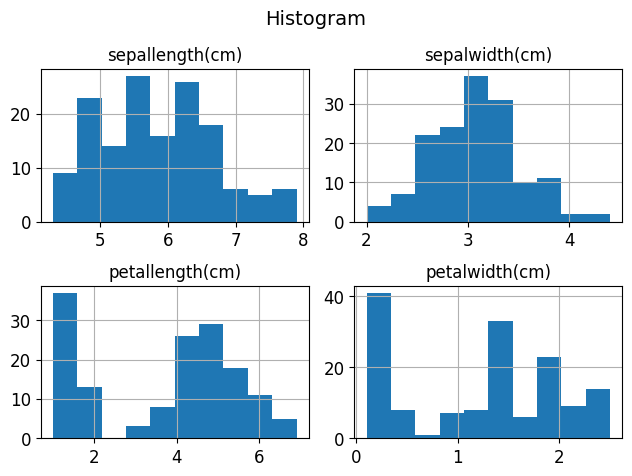

In [ ]:
plt.figure(figsize=(16,10))
iris.hist()
plt.suptitle("Histogram", fontsize=14)
plt.tight_layout(pad=1)
plt.show()

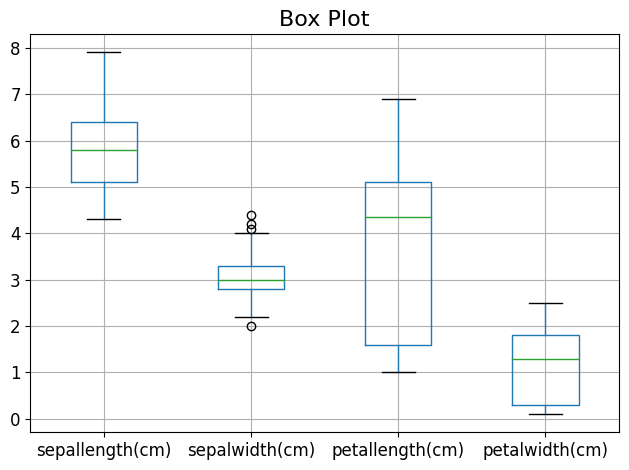

In [ ]:
iris.boxplot()
plt.title("Box Plot", fontsize = 16)
plt.tight_layout()
plt.show()

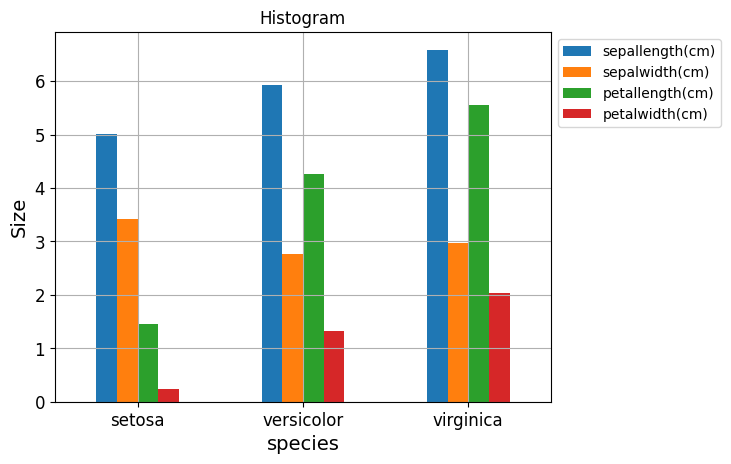

In [ ]:
iris.groupby(by='species').mean()
iris.groupby(by='species').mean().plot(kind='bar')
plt.title('Histogram')
plt.ylabel('Size')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

In [ ]:
corr=iris.corr()
print(corr)

                 sepallength(cm)  sepalwidth(cm)  petallength(cm)  \
sepallength(cm)         1.000000       -0.117570         0.871754   
sepalwidth(cm)         -0.117570        1.000000        -0.428440   
petallength(cm)         0.871754       -0.428440         1.000000   
petalwidth(cm)          0.817941       -0.366126         0.962865   

                 petalwidth(cm)  
sepallength(cm)        0.817941  
sepalwidth(cm)        -0.366126  
petallength(cm)        0.962865  
petalwidth(cm)         1.000000  


<ipython-input-59-b9a848d827fc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=iris.corr()


In [ ]:
import statsmodels.api as sm
from pandas.plotting import scatter_matrix

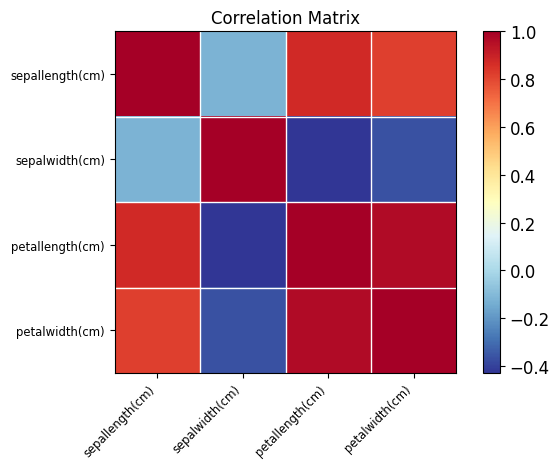

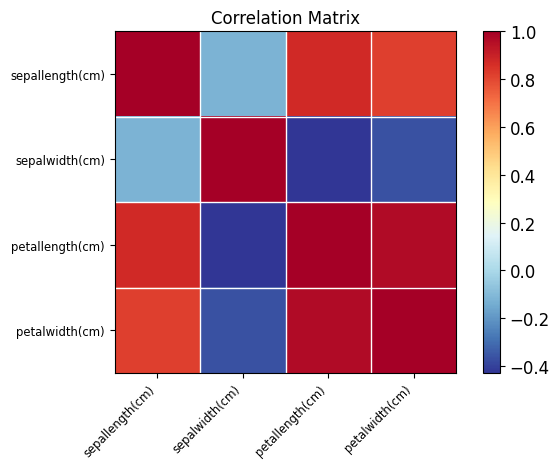

In [ ]:
sm.graphics.plot_corr(corr, xnames=list(corr.columns))

Text(0.5, 0.98, 'Pair Plot')

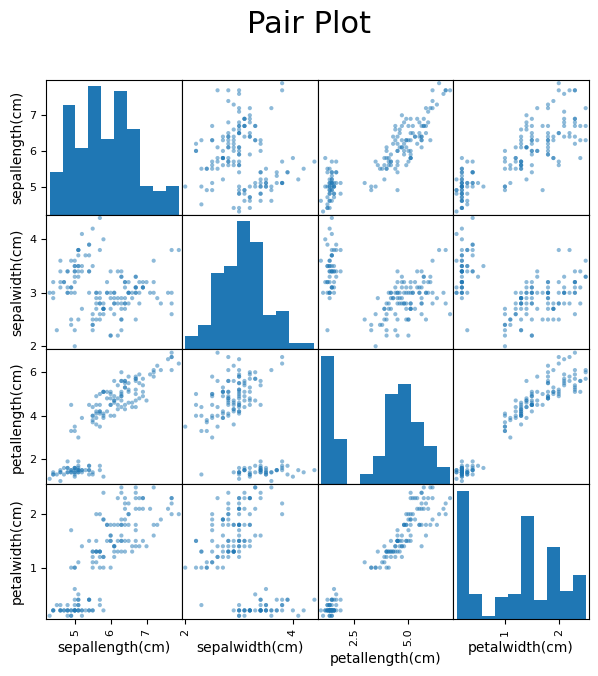

In [68]:
scatter_matrix(iris, figsize=(7,7))
fig = plt.gcf()
for ax in fig.get_axes():
    ax.xaxis.label.set_fontsize(10)
    ax.yaxis.label.set_fontsize(10)
plt.suptitle("Pair Plot", fontsize=22)